# Pymaceuticals Inc.
---
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"Number of unique mice: {combined_data['Mouse ID'].nunique()}")

Number of unique mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Find the IDs of the mice that have duplicate 'Mouse ID' and 'Timepoint'
duplicates = duplicates['Mouse ID'].unique()

# Print the IDs of the mice to be removed
print("Mouse IDs with duplicates that will be removed:", duplicates)

# Create a clean DataFrame by dropping these mice
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicates)]

Mouse IDs with duplicates that will be removed: ['g989']


In [5]:
# Checking the number of mice in the clean DataFrame.
print("Number of unique mice in the clean DataFrame:", cleaned_data['Mouse ID'].nunique())

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_data = cleaned_data.groupby('Drug Regimen')

summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

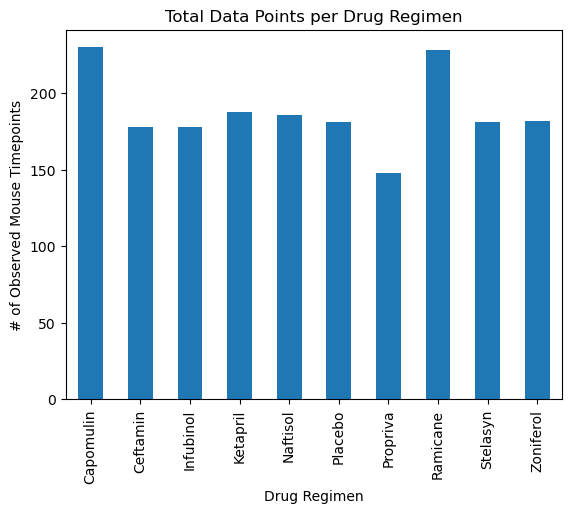

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_data.size().plot(kind='bar')
plt.title('Total Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

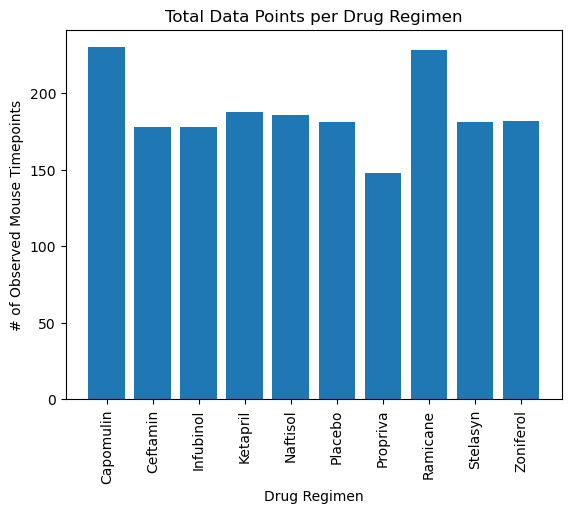

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(grouped_data.size().index, grouped_data.size().values)
plt.title('Total Data Points per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

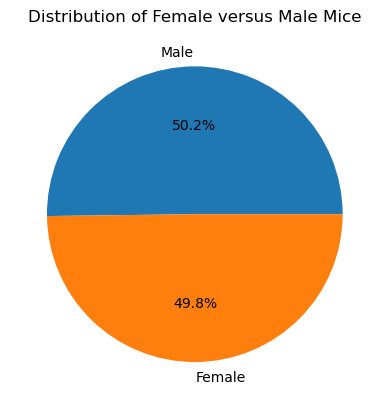

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('')
plt.show()

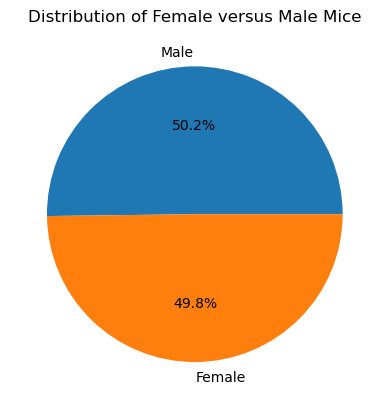

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_metadata['Sex'].value_counts(), labels=mouse_metadata['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID').max()['Timepoint']
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers_data = {}

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(treatment_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
# Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

# Store the IQR data and outliers for each treatment
    outliers_data[treatment] = {
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers
    }

    print(f"{treatment}:")
    print(f"  IQR: {iqr}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"  Outliers: {outliers}\n")

Capomulin:
  IQR: 7.781863460000004
  Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
  Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane:
  IQR: 9.098536719999998
  Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
  Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol:
  IQR: 11.477135160000003
  Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
  Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin:
  IQR: 15.577752179999997
  Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
  Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



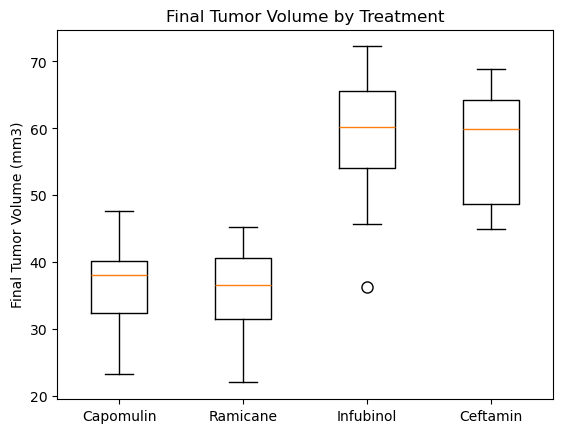

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] for drug in treatments]

# Creating the box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, flierprops=dict(marker='o', color='r', markersize=8))
ax.set_title('Final Tumor Volume by Treatment')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

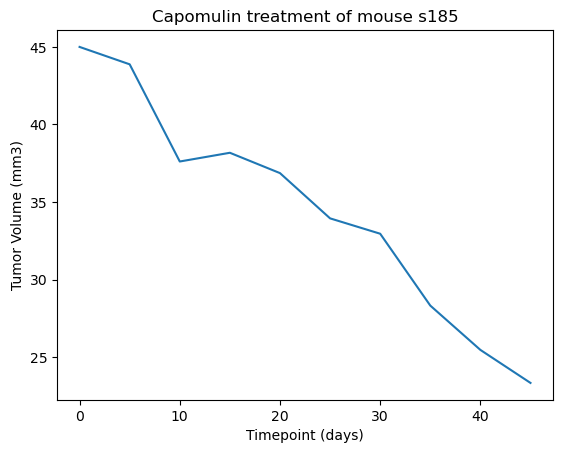

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
sample_mouse = capomulin_data['Mouse ID'].iloc[0]

sample_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == sample_mouse]

plt.plot(sample_mouse_data['Timepoint'], sample_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {sample_mouse}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

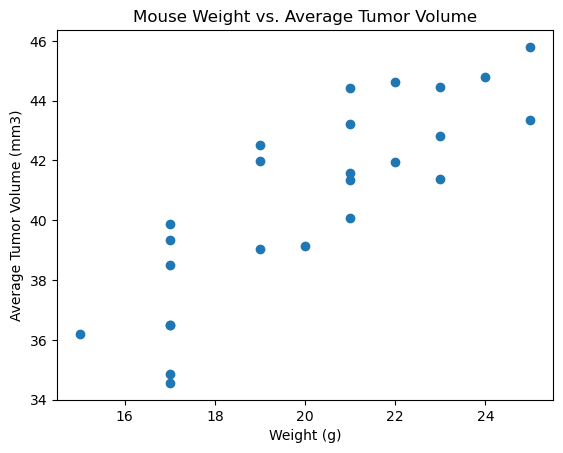

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate average tumor volume for each mouse
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

average_capomulin = capomulin_data.pivot_table(index='Mouse ID', values=['Weight (g)', 'Tumor Volume (mm3)'], aggfunc='mean')

# Generate scatter plot
plt.scatter(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

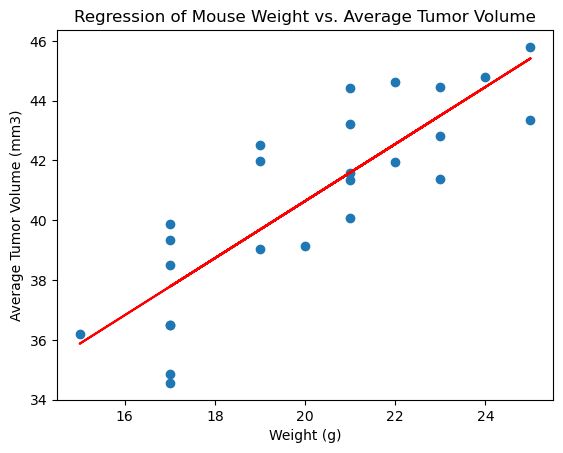

Correlation coefficient: 0.841936342469472


In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])

# Calculate line of best fit
line = slope * average_capomulin['Weight (g)'] + intercept

# Plot the linear regression model on top of the scatter plot
plt.scatter(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])
plt.plot(average_capomulin['Weight (g)'], line, color='red')
plt.title('Regression of Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# Print correlation coefficien
print(f"Correlation coefficient: {r_value}")